In [2]:
%matplotlib inline
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Import data
csv_data = pd.read_csv("Resources/movie_metadata.csv", encoding="utf-8")
df = pd.DataFrame(csv_data)
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [2]:
df.count()

color                        5024
director_name                4939
num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_2_name                 5030
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
actor_1_name                 5036
movie_title                  5043
num_voted_users              5043
cast_total_facebook_likes    5043
actor_3_name                 5020
facenumber_in_poster         5030
plot_keywords                4890
movie_imdb_link              5043
num_user_for_reviews         5022
language                     5031
country                      5038
content_rating               4740
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
dtype: int64

In [3]:
df_clean=df.dropna()

In [4]:
df_clean.count()

color                        3756
director_name                3756
num_critic_for_reviews       3756
duration                     3756
director_facebook_likes      3756
actor_3_facebook_likes       3756
actor_2_name                 3756
actor_1_facebook_likes       3756
gross                        3756
genres                       3756
actor_1_name                 3756
movie_title                  3756
num_voted_users              3756
cast_total_facebook_likes    3756
actor_3_name                 3756
facenumber_in_poster         3756
plot_keywords                3756
movie_imdb_link              3756
num_user_for_reviews         3756
language                     3756
country                      3756
content_rating               3756
budget                       3756
title_year                   3756
actor_2_facebook_likes       3756
imdb_score                   3756
aspect_ratio                 3756
movie_facebook_likes         3756
dtype: int64

In [5]:
budget_imdb_score = df_clean[["budget", "imdb_score"]]

In [6]:
budget_imdb_score

,budget,imdb_score
0,237000000.0,7.9
1,300000000.0,7.1
2,245000000.0,6.8
3,250000000.0,8.5
5,263700000.0,6.6
...,...,...
5026,4500.0,6.9
5027,10000.0,7.5
5033,7000.0,7.0
5035,7000.0,6.9


In [7]:
two_hundred_million_plus =  budget_imdb_score.loc[(budget_imdb_score["budget"] > 200000000)]
one_to_two_hundred_million =  budget_imdb_score.loc[(budget_imdb_score["budget"] >= 100000000) & (budget_imdb_score["budget"] <= 200000000)]
fifty_to_one_hundred_million =  budget_imdb_score.loc[(budget_imdb_score["budget"] >= 50000000) & (budget_imdb_score["budget"] < 100000000)]
under_fifty_million =  budget_imdb_score.loc[(budget_imdb_score["budget"] < 50000000)]

two_hundred_million_plus_mean_imdb = two_hundred_million_plus["imdb_score"].mean()
one_to_two_hundred_million_mean_imdb = one_to_two_hundred_million["imdb_score"].mean()
fifty_to_one_hundred_million_mean_imdb = fifty_to_one_hundred_million["imdb_score"].mean()
under_fifty_million_mean_imdb = under_fifty_million["imdb_score"].mean()


No handles with labels found to put in legend.


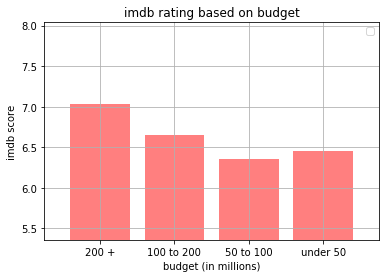

In [8]:

ratings = [two_hundred_million_plus_mean_imdb, one_to_two_hundred_million_mean_imdb, fifty_to_one_hundred_million_mean_imdb, under_fifty_million_mean_imdb]
x_axis = np.arange(len(ratings))
plt.bar(x_axis, ratings, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["200 +", "100 to 200", "50 to 100", "under 50"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(min(ratings)-1, max(ratings)+1)

plt.title("imdb rating based on budget")
plt.xlabel("budget (in millions)")
plt.ylabel("imdb score")

plt.legend(loc="best")
plt.grid()

    
plt.show()

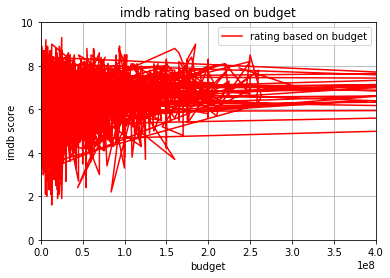

In [9]:


plt.plot(budget_imdb_score["budget"], budget_imdb_score["imdb_score"], color="red", label="rating based on budget")



plt.title("imdb rating based on budget")
plt.xlabel("budget")
plt.ylabel("imdb score")
plt.xlim(0,400000000)
plt.ylim(0,10)
plt.legend(loc="best")
plt.grid()

    
plt.show()

In [10]:
revenue_rating = df_clean[["budget", "gross", "content_rating"]]

In [11]:
revenue_rating["revenue"] = revenue_rating["gross"] - revenue_rating["budget"]

C:\Users\Mike\Anaconda3\envs\python1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
revenue_rating

,budget,gross,content_rating,revenue
0,237000000.0,760505847.0,PG-13,523505847.0
1,300000000.0,309404152.0,PG-13,9404152.0
2,245000000.0,200074175.0,PG-13,-44925825.0
3,250000000.0,448130642.0,PG-13,198130642.0
5,263700000.0,73058679.0,PG-13,-190641321.0
...,...,...,...,...
5026,4500.0,136007.0,R,131507.0
5027,10000.0,673780.0,Not Rated,663780.0
5033,7000.0,424760.0,PG-13,417760.0
5035,7000.0,2040920.0,R,2033920.0


In [13]:
g = revenue_rating.loc[revenue_rating["content_rating"] == "G"]
pg = revenue_rating.loc[revenue_rating["content_rating"] == "PG"]
pg_13 = revenue_rating.loc[revenue_rating["content_rating"] == "PG-13"]
r = revenue_rating.loc[revenue_rating["content_rating"] == "R"]
notRated = revenue_rating.loc[revenue_rating["content_rating"] == "Not Rated"]

 
g_revenue = g["revenue"].mean()
pg_revenue = pg["revenue"].mean()
pg_13_revenue = pg_13["revenue"].mean()
r_revenue = r["revenue"].mean()
notRated_revenue = notRated["revenue"].mean()



No handles with labels found to put in legend.


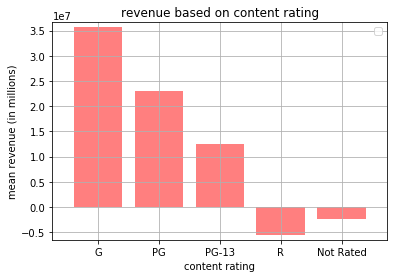

In [15]:
ratings_revenue = [g_revenue, pg_revenue, pg_13_revenue, r_revenue, notRated_revenue]
x_axis = np.arange(len(ratings_revenue))
plt.bar(x_axis, ratings_revenue, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["G", "PG", "PG-13", "R", "Not Rated"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(min(ratings_revenue)-1000000, max(ratings_revenue)+1000000)

plt.title("revenue based on content rating")
plt.xlabel("content rating")
plt.ylabel("mean revenue (in millions)")

plt.legend(loc="best")
plt.grid()

    
plt.show()

In [18]:
revenue_duration = df_clean[["budget", "gross", "duration"]]
revenue_duration["revenue"] = revenue_duration["gross"] - revenue_duration["budget"]

over_150 = revenue_duration.loc[revenue_duration["duration"] > 150]
between_120_and_150 = revenue_duration.loc[(revenue_duration["duration"] > 120) & (revenue_duration["duration"] <= 150)]
between_90_and_120 = revenue_duration.loc[(revenue_duration["duration"] > 90) & (revenue_duration["duration"] <= 120)]
under_90 = revenue_duration.loc[revenue_duration["duration"] <= 90]

 
over_150_revenue = over_150["revenue"].mean()
between_120_and_150_revenue = between_120_and_150["revenue"].mean()
between_90_and_120_revenue = between_90_and_120["revenue"].mean()
under_90_revenue = under_90["revenue"].mean()





C:\Users\Mike\Anaconda3\envs\python1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No handles with labels found to put in legend.


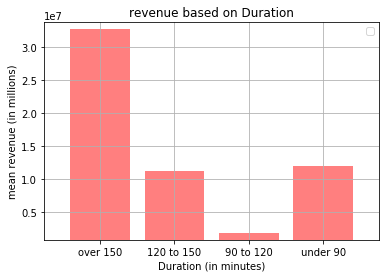

In [19]:
duration_revenue = [over_150_revenue, between_120_and_150_revenue, between_90_and_120_revenue, under_90_revenue]
x_axis = np.arange(len(duration_revenue))
plt.bar(x_axis, duration_revenue, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["over 150", "120 to 150", "90 to 120", "under 90"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(min(duration_revenue)-1000000, max(duration_revenue)+1000000)

plt.title("revenue based on Duration")
plt.xlabel("Duration (in minutes)")
plt.ylabel("mean revenue (in millions)")

plt.legend(loc="best")
plt.grid()

    
plt.show()

In [20]:
imdb_score_content_rating = df_clean[["imdb_score", "content_rating"]]
g = imdb_score_content_rating.loc[imdb_score_content_rating["content_rating"] == "G"]
pg = imdb_score_content_rating.loc[imdb_score_content_rating["content_rating"] == "PG"]
pg_13 = imdb_score_content_rating.loc[imdb_score_content_rating["content_rating"] == "PG-13"]
r = imdb_score_content_rating.loc[imdb_score_content_rating["content_rating"] == "R"]
notRated = imdb_score_content_rating.loc[imdb_score_content_rating["content_rating"] == "Not Rated"]

 
g_score = g["imdb_score"].mean()
pg_score = pg["imdb_score"].mean()
pg_13_score = pg_13["imdb_score"].mean()
r_score = r["imdb_score"].mean()
notRated_score = notRated["imdb_score"].mean()


No handles with labels found to put in legend.


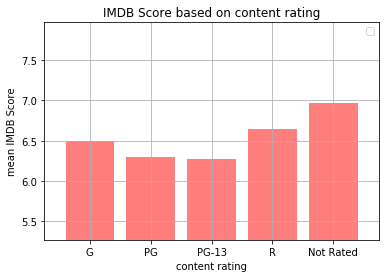

In [21]:
score_rating = [g_score, pg_score, pg_13_score, r_score, notRated_score]
x_axis = np.arange(len(score_rating))
plt.bar(x_axis, score_rating, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["G", "PG", "PG-13", "R", "Not Rated"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(min(score_rating)-1, max(score_rating)+1)

plt.title("IMDB Score based on content rating")
plt.xlabel("content rating")
plt.ylabel("mean IMDB Score")

plt.legend(loc="best")
plt.grid()

    
plt.show()